In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ARDRegression, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [2]:
path = "C:/Users/w1832138/Documents/daily_dataset/"  
all_files = [os.path.join(path, f"block_{num}.csv") for num in range(0, 112)]
df = [pd.read_csv(file)[['day', 'LCLid', 'energy_sum']] for file in all_files]
energy = pd.concat(df, ignore_index=True)

In [3]:
print(energy.head())

          day      LCLid  energy_sum
0  2012-10-12  MAC000002       7.098
1  2012-10-13  MAC000002      11.087
2  2012-10-14  MAC000002      13.223
3  2012-10-15  MAC000002      10.257
4  2012-10-16  MAC000002       9.769


In [4]:
print(energy.shape)

(3510433, 3)


In [5]:
print(energy.describe())

         energy_sum
count  3.510403e+06
mean   1.012414e+01
std    9.128793e+00
min    0.000000e+00
25%    4.682000e+00
50%    7.815000e+00
75%    1.256900e+01
max    3.325560e+02


In [6]:
print(energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   day         object 
 1   LCLid       object 
 2   energy_sum  float64
dtypes: float64(1), object(2)
memory usage: 80.3+ MB
None


In [7]:
energy.dropna(inplace=True)
print(energy.isnull().sum())  # Better for checking each column for nulls

day           0
LCLid         0
energy_sum    0
dtype: int64


In [8]:
print(energy.shape)

(3510403, 3)


In [9]:
path1 = "C:/Users/w1832138/Documents/weather_daily_darksky.csv"

In [10]:
weather = pd.read_csv(path1)

In [11]:
print(weather.head())

   temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2

In [12]:
print(weather.describe())

       temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      882.000000   882.000000  882.000000  881.000000  882.000000   
mean        13.660113   195.702948    6.530034    0.477605    3.581803   
std          6.182744    89.340783    4.830875    0.193514    1.694007   
min         -0.060000     0.000000   -7.840000    0.000000    0.200000   
25%          9.502500   120.500000    3.180000    0.350000    2.370000   
50%         12.625000   219.000000    6.380000    0.470000    3.440000   
75%         17.920000   255.000000   10.057500    0.600000    4.577500   
max         32.400000   359.000000   17.770000    1.000000    9.960000   

          pressure  apparentTemperatureHigh  visibility    humidity  \
count   882.000000               882.000000  882.000000  882.000000   
mean   1014.127540                12.723866   11.167143    0.781871   
std      11.073038                 7.279168    2.466109    0.095348   
min     979.250000                -6.460000    1.

In [13]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [14]:
print(weather.shape)

(882, 32)


In [15]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting variables
weather = weather[['temperatureMax','temperatureMin', 'temperatureHigh','day','humidity']]

In [16]:
weather = weather.dropna()

In [17]:
print(weather.shape)

(882, 5)


<Axes: >

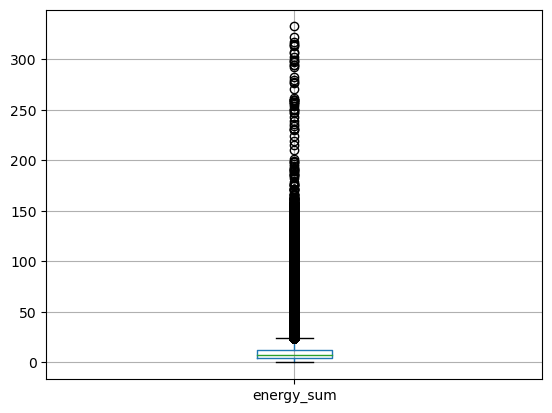

In [18]:
energy.boxplot(column=["energy_sum"])

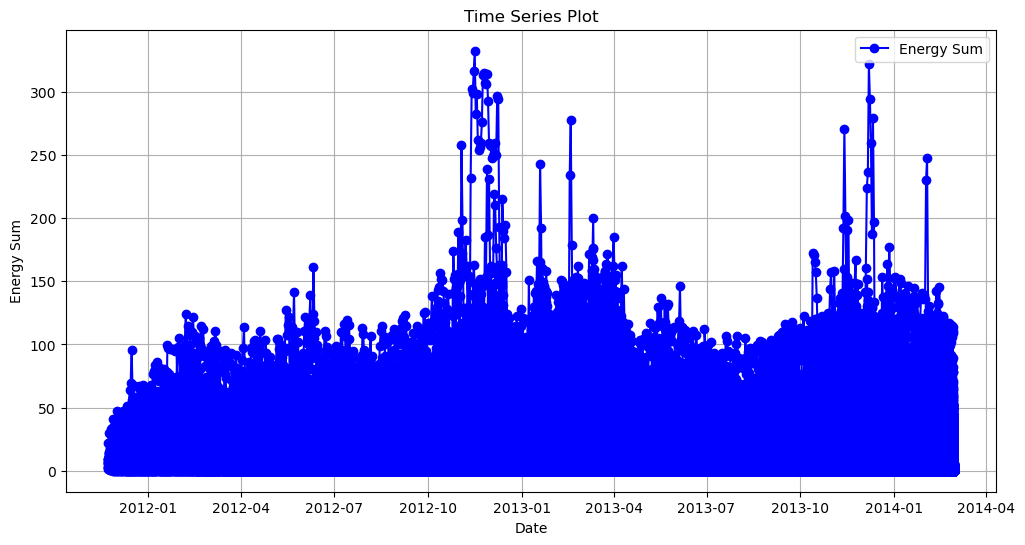

In [19]:
energy['day'] = pd.to_datetime(energy['day'])
plt.figure(figsize=(12, 6))
plt.plot(energy['day'], energy['energy_sum'], label='Energy Sum', marker='o', linestyle='-', color='b')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Energy Sum')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
energy['year'] = energy['day'].dt.year
yearly_avg = energy.groupby('year')['energy_sum'].mean().reset_index()

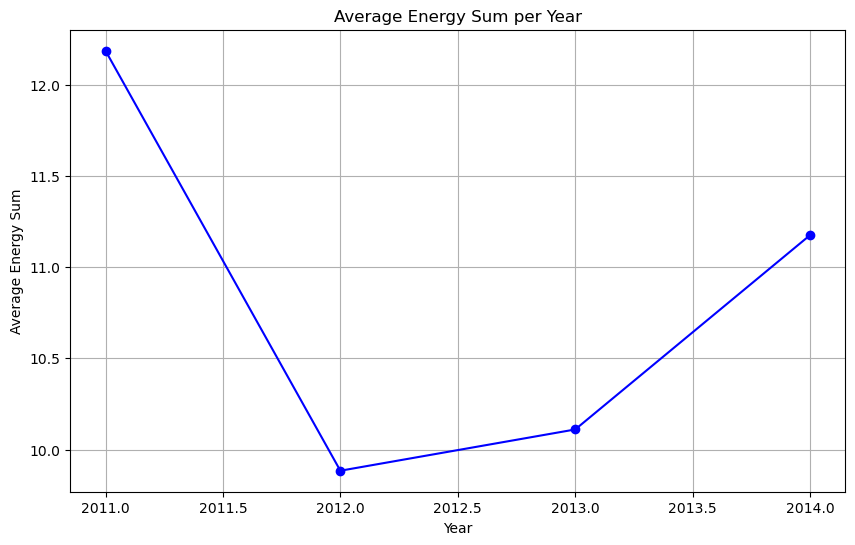

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['energy_sum'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Sum per Year')
plt.xlabel('Year')
plt.ylabel('Average Energy Sum')
plt.grid(True)
plt.show()

In [22]:
housecount = energy.groupby('day')[['LCLid']].nunique().rename(columns={'LCLid': 'No. of Houses'})

In [23]:
energy = energy.groupby('day')[['energy_sum']].sum().rename(columns={'energy_sum': 'total_energy_sum'})
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

In [24]:
energy.head()

,day,total_energy_sum,No. of Houses
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [25]:
energy.describe()

,day,total_energy_sum,No. of Houses
count,829,829.000000,829.000000
mean,2013-01-10 00:00:00,42870.715689,4234.503016
min,2011-11-23 00:00:00,90.385000,13.000000
25%,2012-06-17 00:00:00,34421.895002,4084.000000
50%,2013-01-10 00:00:00,45846.575997,5138.000000
75%,2013-08-05 00:00:00,58795.512000,5369.000000
max,2014-02-28 00:00:00,82650.492003,5532.000000
std,NaN,20141.286953,1789.969230


In [26]:
print(energy.columns)

Index(['day', 'total_energy_sum', 'No. of Houses'], dtype='object')


In [27]:
energy["avg_energy_per_household"] = energy["total_energy_sum"] / energy["No. of Houses"]
energy["day"] = pd.to_datetime(energy["day"])

In [28]:
energy = energy[energy['day'].dt.year != 2014]

In [29]:
print(energy.shape)

(770, 4)


In [30]:
print(energy.columns)


Index(['day', 'total_energy_sum', 'No. of Houses', 'avg_energy_per_household'], dtype='object')


In [31]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [32]:
energy.head()

,day,total_energy_sum,No. of Houses,avg_energy_per_household
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [33]:
weather.head()

,temperatureMax,temperatureMin,temperatureHigh,day,humidity
0,11.96,8.85,10.87,2011-11-11,0.95
1,8.59,2.48,8.59,2011-12-11,0.88
2,10.33,8.03,10.33,2011-12-27,0.74
3,8.07,2.56,7.36,2011-12-02,0.87
4,8.22,3.17,7.93,2011-12-24,0.80


In [34]:
#merge weather and energy datasets
weather_energy = energy.merge(weather, on='day')
weather_energy = weather_energy.dropna()
weather_energy.head()

,day,total_energy_sum,No. of Houses,avg_energy_per_household,temperatureMax,temperatureMin,temperatureHigh,humidity
0,2011-11-23,90.385000,13,6.952692,10.36,3.81,10.36,0.93
1,2011-11-24,213.412000,25,8.536480,12.93,8.56,12.93,0.89
2,2011-11-25,303.993000,32,9.499781,13.03,7.46,12.27,0.79
3,2011-11-26,420.976000,41,10.267707,12.96,7.01,12.96,0.81
4,2011-11-27,444.883001,41,10.850805,13.54,4.47,13.54,0.72


In [35]:
weather_energy.describe()

,total_energy_sum,No. of Houses,avg_energy_per_household,temperatureMax,temperatureMin,temperatureHigh,humidity
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,41774.220917,4166.479221,10.296745,13.982169,7.664013,13.872779,0.778506
std,20435.377294,1845.063605,1.895797,6.455209,5.080329,6.530274,0.096566
min,90.385000,13.000000,6.952692,-0.060000,-5.640000,-0.810000,0.430000
25%,29389.288748,3702.750000,8.498172,9.570000,3.740000,9.325000,0.710000
50%,43929.560498,5193.000000,10.106376,13.140000,7.445000,13.080000,0.790000
75%,58829.098507,5380.000000,11.896140,18.557500,11.827500,18.517500,0.850000
max,82650.492003,5532.000000,15.940238,32.400000,20.540000,32.400000,0.980000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


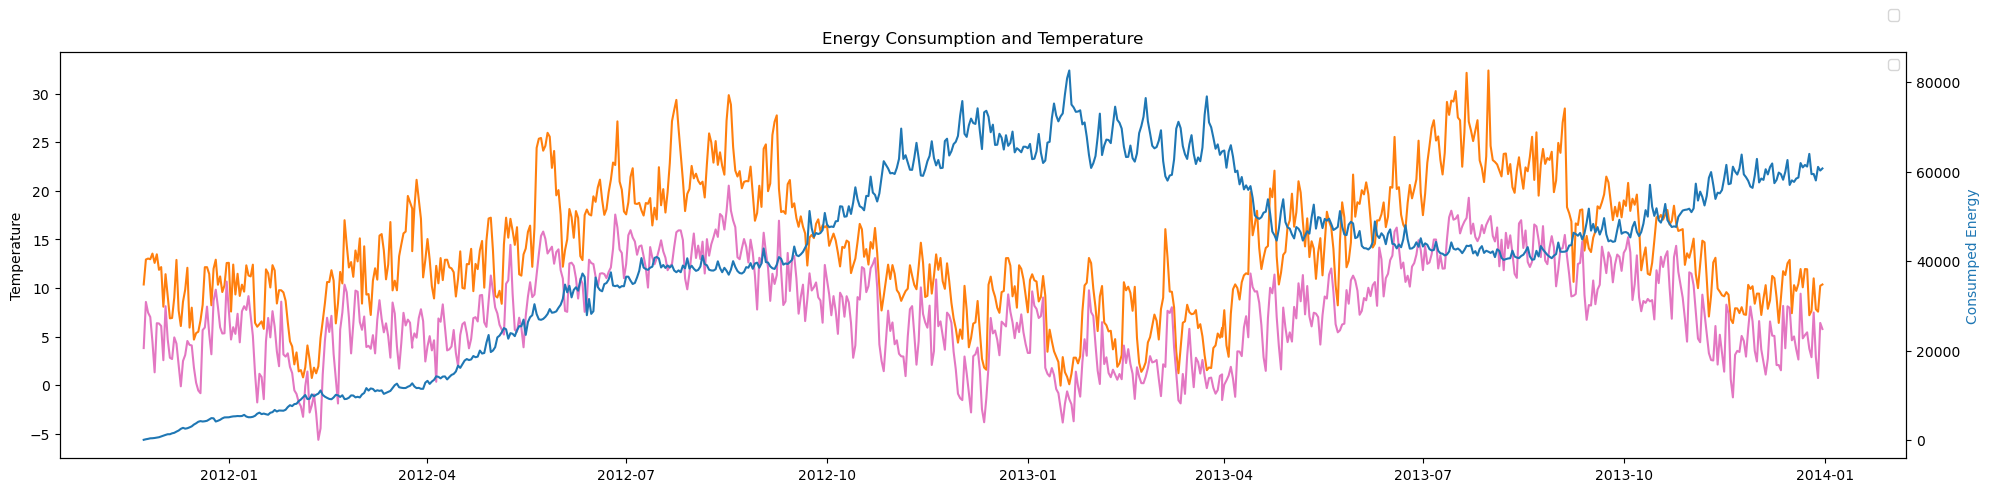

In [36]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange')
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.total_energy_sum,color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

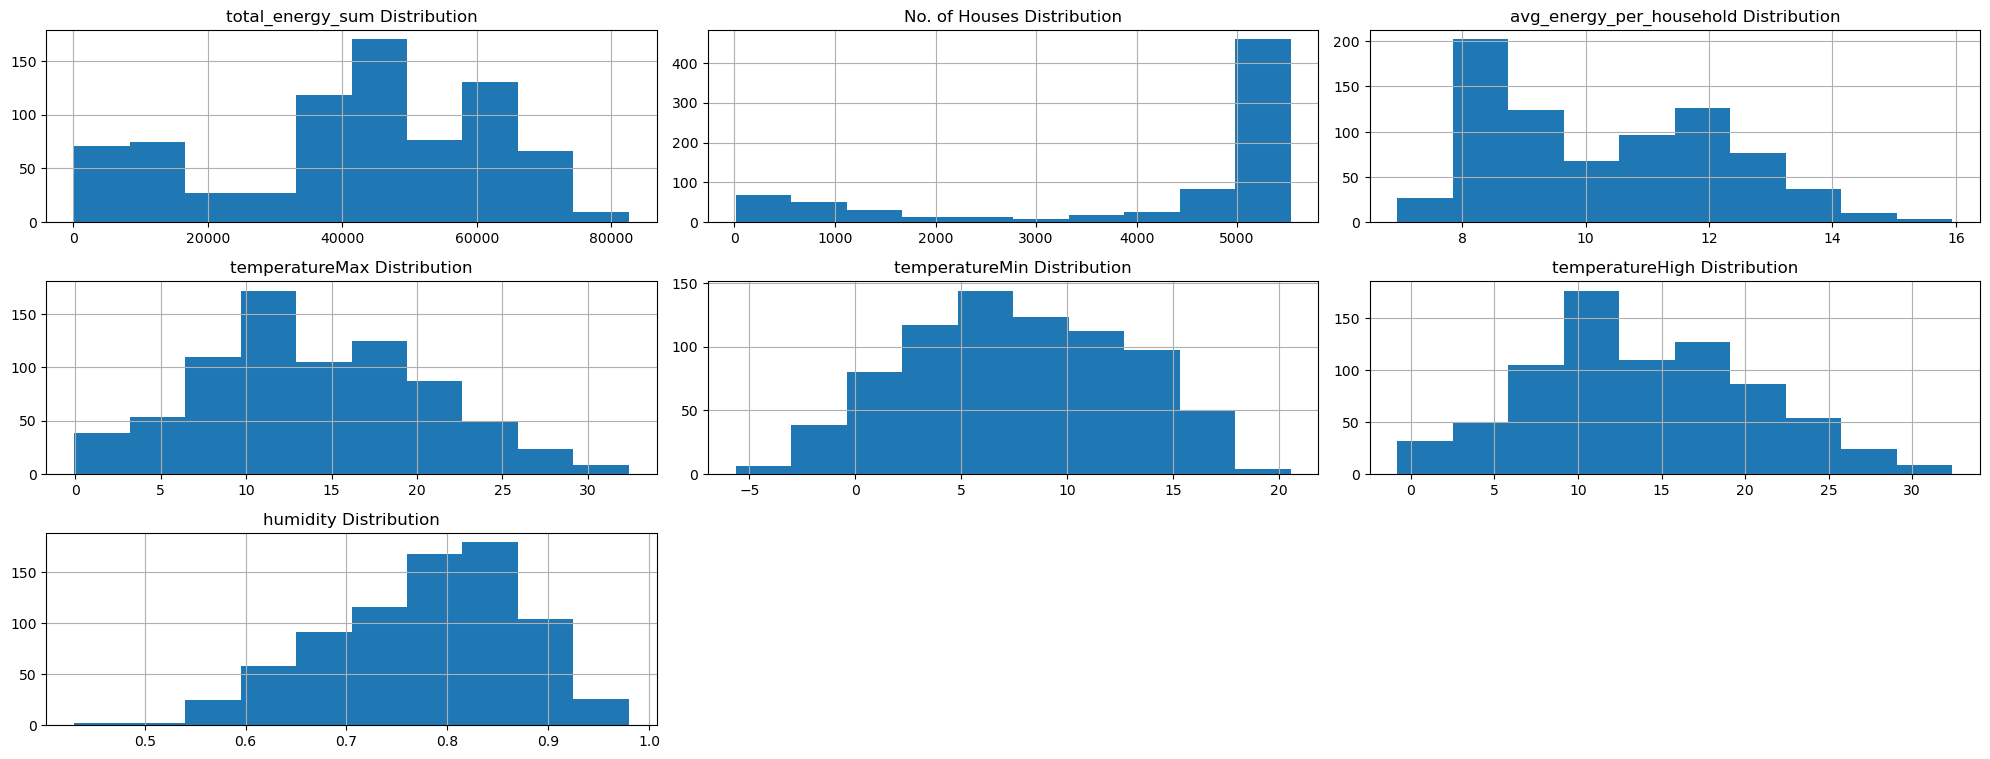

In [37]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(weather_energy, weather_energy.iloc[:,1:19], 6, 3)

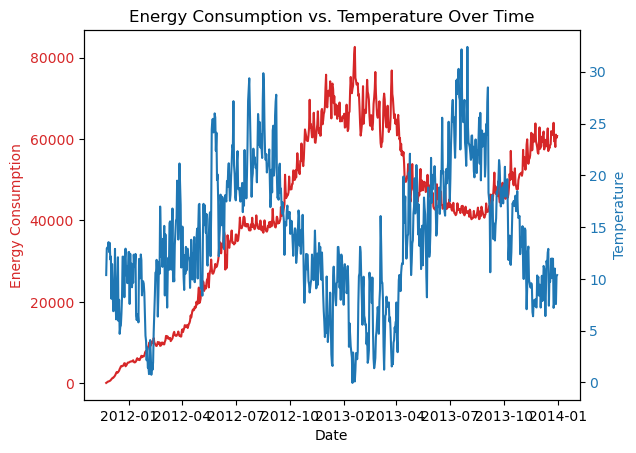

In [38]:
fig, ax1 = plt.subplots()

# Plotting the energy consumption
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color=color)
ax1.plot(weather_energy['day'], weather_energy['total_energy_sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the temperature data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(weather_energy['day'], weather_energy['temperatureMax'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Energy Consumption vs. Temperature Over Time')
plt.show()

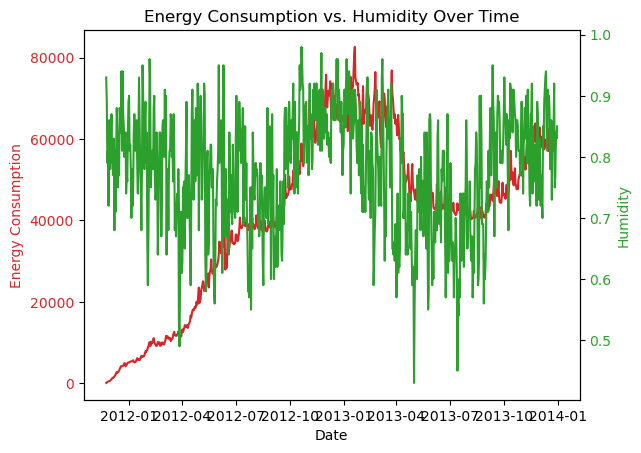

In [39]:
fig, ax1 = plt.subplots()

# Plotting the energy consumption
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Consumption', color=color)
ax1.plot(weather_energy['day'], weather_energy['total_energy_sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the temperature data
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Humidity', color=color)
ax2.plot(weather_energy['day'], weather_energy['humidity'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Energy Consumption vs. Humidity Over Time')
plt.show()

In [40]:
weather_energy.head()

,day,total_energy_sum,No. of Houses,avg_energy_per_household,temperatureMax,temperatureMin,temperatureHigh,humidity
0,2011-11-23,90.385000,13,6.952692,10.36,3.81,10.36,0.93
1,2011-11-24,213.412000,25,8.536480,12.93,8.56,12.93,0.89
2,2011-11-25,303.993000,32,9.499781,13.03,7.46,12.27,0.79
3,2011-11-26,420.976000,41,10.267707,12.96,7.01,12.96,0.81
4,2011-11-27,444.883001,41,10.850805,13.54,4.47,13.54,0.72


In [41]:
weather_energy['time'] = (weather_energy['day'] - weather_energy['day'].min())  / np.timedelta64(1,'D')
days = weather_energy['day']
weather_energy = weather_energy.drop(['day'], axis=1)
weather_energy.head()

,total_energy_sum,No. of Houses,avg_energy_per_household,temperatureMax,temperatureMin,temperatureHigh,humidity,time
0,90.385000,13,6.952692,10.36,3.81,10.36,0.93,0.0
1,213.412000,25,8.536480,12.93,8.56,12.93,0.89,1.0
2,303.993000,32,9.499781,13.03,7.46,12.27,0.79,2.0
3,420.976000,41,10.267707,12.96,7.01,12.96,0.81,3.0
4,444.883001,41,10.850805,13.54,4.47,13.54,0.72,4.0


In [42]:
X = weather_energy.drop(['total_energy_sum'], axis=1)
y = weather_energy[['total_energy_sum']]

train_ratio = int(len(X) * 0.8)

X_train = X[0:train_ratio]
X_test = X[train_ratio:len(X)]

y_train = y[0:train_ratio]
y_test = y[train_ratio:len(X)]

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
regressors = []

regressors.append(('Linear Regressor', LinearRegression()))
regressors.append(('Ridge', Ridge()))
regressors.append(('Decision Tree', DecisionTreeRegressor()))
regressors.append(('Random Forest', RandomForestRegressor(n_estimators=100, n_jobs=-1)))
regressors.append(('ARD Regressor', ARDRegression()))

for name, model in regressors:
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    print(name)
    print("R2 Score: {}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regressor
R2 Score: 0.8555286200226995
Root Mean Squared Error: 2765.29013690487
Ridge
R2 Score: 0.8738962104167182
Root Mean Squared Error: 2583.5321061620434
Decision Tree
R2 Score: 0.9007408090683289
Root Mean Squared Error: 2292.1084357212476
Random Forest
R2 Score: 0.9623312562301047
Root Mean Squared Error: 1412.0184211461788
ARD Regressor
R2 Score: 0.8546330124262386
Root Mean Squared Error: 2773.8481933318803


In [45]:
regressors = RandomForestRegressor(n_estimators=100, n_jobs=-1)

regressors.fit(X_train, y_train.values.ravel())
y_pred = regressors.predict(X_test)

In [46]:
result = pd.DataFrame()
result['Prediction'] = y_pred
result['True'] = y_test.values.ravel()
result['Diff'] = y_test.values.ravel() - y_pred

In [47]:
test_days = days[train_ratio:len(X)]

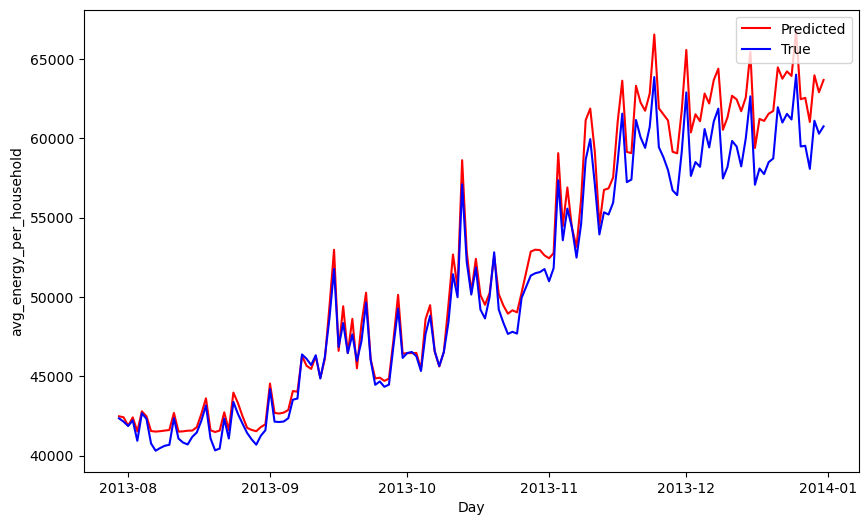

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
plt.plot(test_days, result['True'], color='b', label='True')
plt.xlabel('Day')
plt.ylabel('avg_energy_per_household')
plt.legend(loc='upper right')
plt.show()

In [49]:

# Assuming 'energy' DataFrame has been aggregated by day and reset index
energy.index = pd.to_datetime(energy['day'])  # setting 'day' as the index
energy.drop(['day'], axis=1, inplace=True)

# Fit a SARIMA model
mod = sm.tsa.statespace.SARIMAX(energy['avg_energy_per_household'],
                                order=(1, 1, 1),              # These are example parameters
                                seasonal_order=(1, 1, 0, 12), # Change as necessary based on your data
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

C:\UoW_Apps\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\UoW_Apps\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:            avg_energy_per_household   No. Observations:                  770
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -670.073
Date:                             Wed, 08 May 2024   AIC                           1348.147
Time:                                     00:53:21   BIC                           1366.595
Sample:                                 11-23-2011   HQIC                          1355.258
                                      - 12-31-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7523      0.024     30.904      0.000       0.705       0.800
ma.L1         -0.9683      

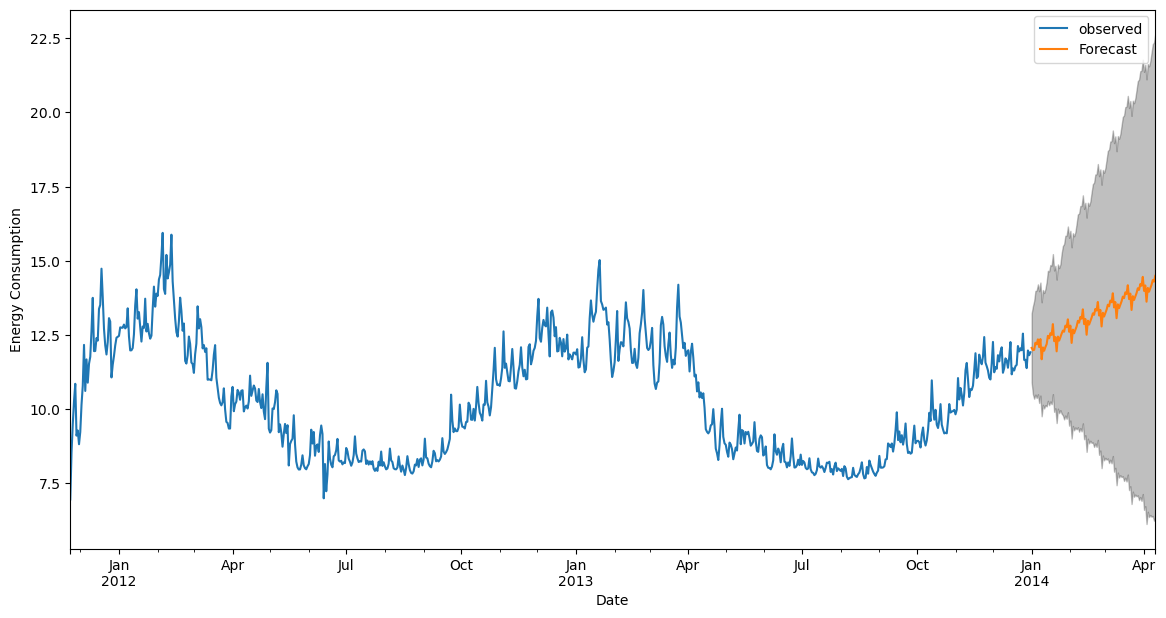

In [50]:
# Predict future values
pred_uc = results.get_forecast(steps=100
                              )  # Forecast next 100 days
pred_ci = pred_uc.conf_int()

 #Plotting the results
ax = energy['avg_energy_per_household'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption')

plt.legend()
plt.show()

In [51]:
# 'What if' analysis
# Initial 100-day forecast based on the original data
pred_original = results.get_forecast(steps=100)

In [52]:
# Create a new column with 20% reduced energy consumption
energy['reduced_energy'] = energy['avg_energy_per_household'] * 0.8

In [53]:
#Fit a new SARIMA model using the reduced energy data
mod_reduced = sm.tsa.statespace.SARIMAX(
    energy['reduced_energy'],
    order=(1, 1, 1),  # Adjust as needed
    seasonal_order=(1, 1, 0, 12),  # Adjust as needed
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_reduced = mod_reduced.fit()

print(results_reduced.summary())

C:\UoW_Apps\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\UoW_Apps\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                      reduced_energy   No. Observations:                  770
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -504.051
Date:                             Wed, 08 May 2024   AIC                           1016.103
Time:                                     00:53:22   BIC                           1034.551
Sample:                                 11-23-2011   HQIC                          1023.214
                                      - 12-31-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7522      0.024     30.851      0.000       0.704       0.800
ma.L1         -0.9682      

In [54]:
# Predict 100 days into the future with the new model
pred_reduced = results_reduced.get_forecast(steps=100)

# Confidence intervals for the new predictions
pred_ci_reduced = pred_reduced.conf_int()

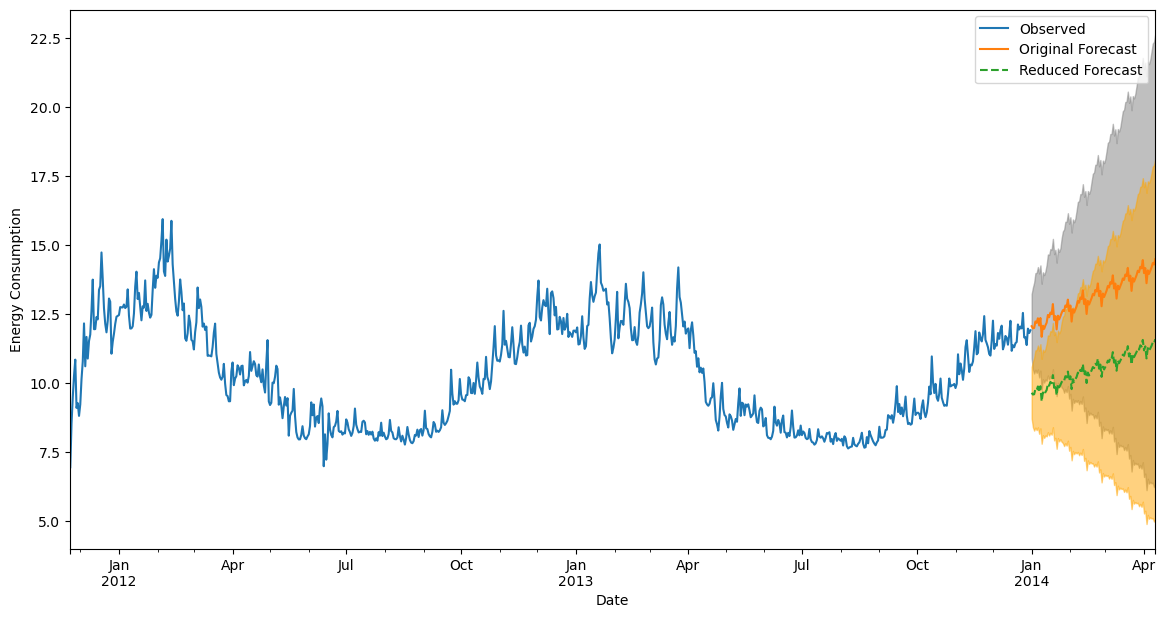

In [55]:
# Plot original predictions vs reduced predictions
ax = energy['avg_energy_per_household'].plot(label='Observed', figsize=(14, 7))
pred_original.predicted_mean.plot(ax=ax, label='Original Forecast')
pred_reduced.predicted_mean.plot(ax=ax, label='Reduced Forecast', linestyle='--')

# Confidence intervals for the original forecast
ax.fill_between(
    pred_original.conf_int().index,
    pred_original.conf_int().iloc[:, 0],
    pred_original.conf_int().iloc[:, 1],
    color='gray', alpha=0.5
)

# Confidence intervals for the reduced forecast
ax.fill_between(
    pred_ci_reduced.index,
    pred_ci_reduced.iloc[:, 0],
    pred_ci_reduced.iloc[:, 1],
    color='orange', alpha=0.5
)

ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption')
plt.legend()
plt.show()